# The Perceptron Classifier

Uses Stochastic Gradient Descent 
- W parameters are updated based on each training examples $x_n$. 
- It's an online leaning.
- Learning rate needs to be defined.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from utils import plot_DR, plot_DB
from warnings import filterwarnings
filterwarnings('ignore')
%matplotlib inline

In [2]:
X, y = make_blobs(n_samples=100, centers=2, n_features=2, cluster_std=2, random_state=20)

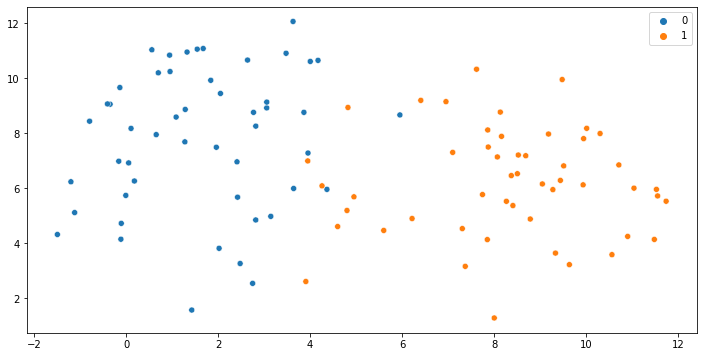

In [3]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y);

In [4]:
class Perceptron:
    def __init__(self, W=None, num_epochs=20, lr=0.005, scale=True):
        self.W = W
        self.scale = scale
        self.num_epochs = num_epochs
        self.lr = lr
    
    def _scale_fit(self, X, L=-1, H=1):
        P = X.shape[1]
        self.a = []; self.b = []
        for p in range(P):
            self.a.append(((H * min(X[:, p])) - (L * max(X[:, p])))/(H-L))
            self.b.append((max(X[:, p]) - min(X[:, p]))/(H - L))

    def _scale_transform(self, X):
        X_scaled = (X - self.a)/self.b
        return X_scaled.reshape(X.shape[0], -1)
    
    def _scale_inverse(X):
        return (X * self.b) + self.a
    
    def fit(self, X, y):
        N, P = X.shape
        if self.scale:
            self._scale_fit(X)
            X = self._scale_transform(X)
        # initialize W
        if self.W is None:
            self.W = np.random.normal(loc=0.0, scale=0.01, size=P+1)
            
        self.errors = [] 
        for _ in range(self.num_epochs):
            misc = 0
            for i in range(len(X)+1):
                # add one for bias
                xi, yi = X[i:i+1],  y[i:i+1]
                xi = np.append(xi, np.ones((xi.shape[0], 1)), axis=1)
                # make pred
                pred = self.activation(xi.dot(self.W))
                if pred!=yi:
                    self.W += (self.lr*(yi - pred)*xi).flatten()
                    misc += 1
            self.errors.append(misc)
         
    def activation(self, a):
        return 1.0 if a > 0 else 0.0
    
    def predict(self, X):
        if self.scale:
            X = self._scale_transform(X)
        X = np.append(X, np.ones((X.shape[0], 1)), axis=1)
        return np.array([self.activation(xi.dot(self.W)) for xi in X])

In [6]:
num_epochs = 100
model = Perceptron(num_epochs=num_epochs)
model.fit(X, y)

In [7]:
acc = 100 * sum(model.predict(X)==y)/len(y)
print('Accuracy: {} %'.format(acc))

Accuracy: 95.0 %


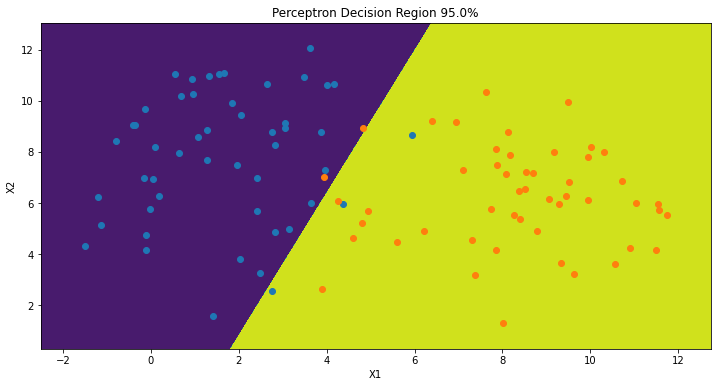

In [8]:
plot_DR(X, y, model, 'Perceptron Decision Region {}%'.format(acc))

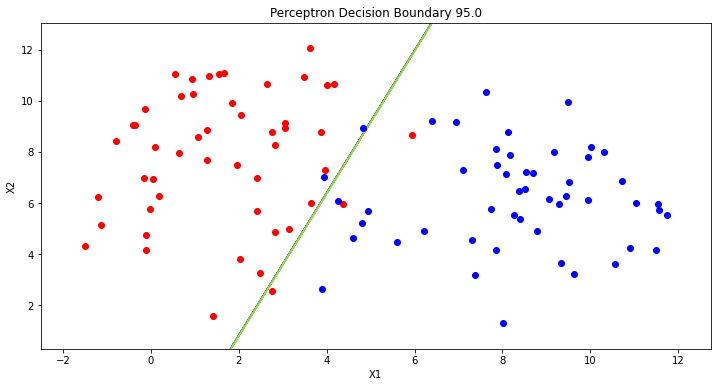

In [9]:
plot_DB(X, y, model, 'Perceptron Decision Boundary {}'.format(acc))

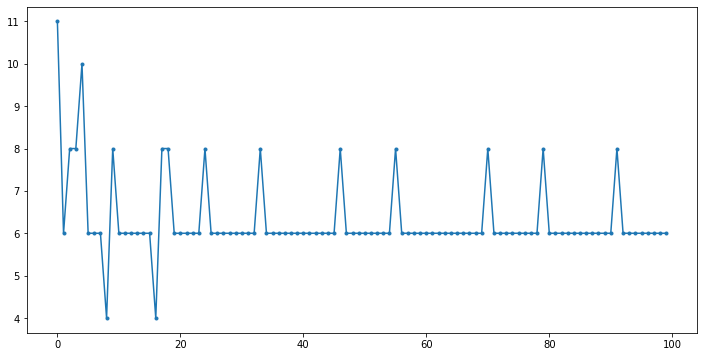

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(range(num_epochs), model.errors, '.-');